In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

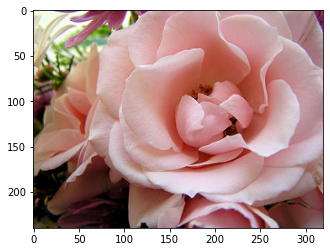

In [3]:
image1_path=(r'D:\dataset_for_ml\flowers\rose\rose1.jpg')

img=image.load_img(image1_path)
plt.imshow(img)

In [4]:
cv2.imread(image1_path).shape

(240, 320, 3)

In [5]:
cv2.imread(image1_path)

array([[[212, 241, 232],
        [232, 245, 237],
        [230, 242, 230],
        ...,
        [ 85,  68, 165],
        [ 91,  50, 125],
        [ 95,  54, 121]],

       [[224, 248, 240],
        [241, 252, 244],
        [238, 248, 236],
        ...,
        [ 45,  29, 123],
        [ 76,  50, 126],
        [103,  57, 133]],

       [[229, 247, 240],
        [241, 252, 244],
        [237, 248, 238],
        ...,
        [ 48,  32, 120],
        [ 70,  58, 134],
        [ 99,  53, 135]],

       ...,

       [[ 36,  75,  77],
        [ 33,  65,  70],
        [ 48,  70,  76],
        ...,
        [121, 113, 136],
        [121, 114, 135],
        [121, 115, 134]],

       [[ 38,  68,  73],
        [ 41,  65,  71],
        [ 55,  74,  82],
        ...,
        [128, 119, 140],
        [129, 118, 138],
        [128, 118, 135]],

       [[ 47,  68,  76],
        [ 50,  67,  76],
        [ 59,  75,  87],
        ...,
        [132, 121, 141],
        [131, 119, 137],
        [130, 119, 135]]

## Defining Model Inputs

In [6]:
batch_size = 32

img_height = 180
img_width = 180

data_dir=r'D:\dataset_for_ml\flowers'

# Training Dataset

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4375 files belonging to 7 classes.
Using 3500 files for training.


# Validation Dataset

In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4375 files belonging to 7 classes.
Using 875 files for validation.


# Name of the classes

In [9]:
class_names = train_ds.class_names

print(class_names)

['base', 'daisy', 'dandelion', 'rose', 'saver', 'sunflower', 'tulip']


# Some examples from the dataset

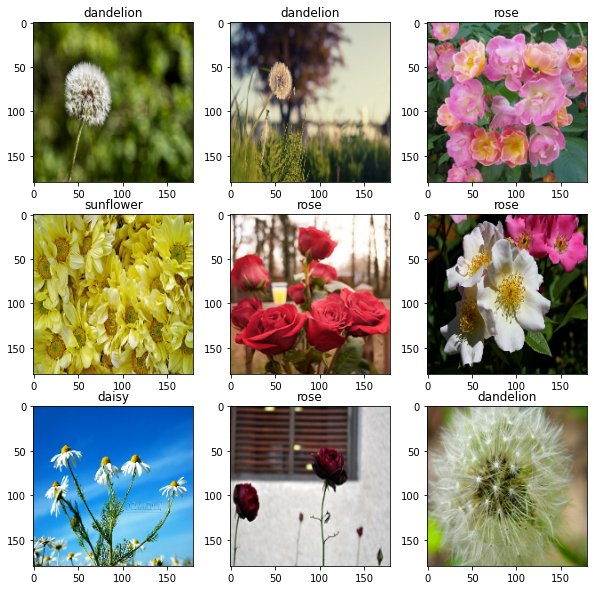

In [10]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])


In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


# Data augmentation

In [12]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,img_width,3)),
      
    layers.RandomRotation(0.1),
      
    layers.RandomZoom(0.1),
      
  ]
)

# if the data in the dataset is small then we use this method to 


# Some of the augmented images

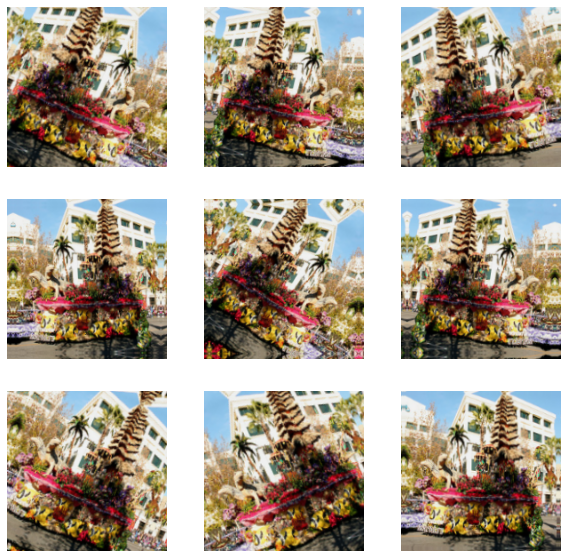

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Creating Model

In [ ]:
num_classes=len(class_names)

model=keras.Sequential()


#rescaling layer
model.add(keras.layers.Rescaling(1./255,input_shape=(img_height,img_width,3)))



model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))



model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))



model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))



model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))



model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    
model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(units=4096,activation="relu"))


model.add(keras.layers.Dense(num_classes))

In [14]:
model=keras.models.load_model(r"D:\dataset_for_ml\flowers\saver\mod")

In [15]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

# Compile and Training the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs = 10


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
110/110 [==============================] - 58s 517ms/step - loss: 0.7881 - accuracy: 0.7200 - val_loss: 0.7463 - val_accuracy: 0.7154
Epoch 2/10
110/110 [==============================] - 58s 523ms/step - loss: 0.7296 - accuracy: 0.7394 - val_loss: 0.8537 - val_accuracy: 0.6823
Epoch 3/10
110/110 [==============================] - 60s 546ms/step - loss: 0.6886 - accuracy: 0.7517 - val_loss: 0.7116 - val_accuracy: 0.7429
Epoch 4/10
110/110 [==============================] - 60s 546ms/step - loss: 0.6842 - accuracy: 0.7537 - val_loss: 0.7735 - val_accuracy: 0.7189
Epoch 5/10
110/110 [==============================] - 67s 613ms/step - loss: 0.6649 - accuracy: 0.7534 - val_loss: 0.9188 - val_accuracy: 0.6731
Epoch 6/10
110/110 [==============================] - 58s 528ms/step - loss: 0.6408 - accuracy: 0.7709 - val_loss: 0.7305 - val_accuracy: 0.7360
Epoch 7/10
110/110 [==============================] - 58s 528ms/step - loss: 0.6283 - accuracy: 0.7726 - val_loss: 0.7745 - val_ac

# Ploting the progress

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Saving the model

In [ ]:
model.save(r"D:\dataset_for_ml\flowers\saver\mod")

# Predicting using the model

In [ ]:
flower_path = r'C:\Users\siddharth\Dropbox\PC\Downloads\flower.jpg'


flower=image.load_img(flower_path)
plt.imshow(flower)

In [ ]:
img = tf.keras.utils.load_img(
                             flower_path,
                             target_size=(img_height, img_width))


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# IMAGE SEARCHIING FOR SIMILAR IMAGES IN DATA

In [ ]:
#Making a list of all file paths 

import os

path = "D:/dataset_for_ml/flowers/base/"

files = os.listdir(path)
img_paths=[]                  
for file in files:
    # make sure file is an image
    img_path = path + file
    img_paths.append(img_path)


 ## Representing all images in data as a vector

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)




img_vector_features = []


for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224,3))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    

    model_feature = model.predict(img_data)
    model_feature = np.array(model_feature)
    model_feature = model_feature.flatten()
    img_vector_features.append(model_feature)

## Giving a query image

In [ ]:
query_path = r'D:\dataset_for_ml\flowers\sunflower\s1.jpg'


img=image.load_img(query_path)
plt.imshow(img)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


img = image.load_img(query_path, target_size=(224, 224,3))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)


model_feature = model.predict(img_data)
model_feature = np.array(model_feature)
query_feature = model_feature.flatten()


# Numbers of similar images
N_QUERY_RESULT = 4
nbrs = NearestNeighbors(n_neighbors=N_QUERY_RESULT, metric="cosine").fit(img_vector_features)


distances, indices = nbrs.kneighbors([query_feature])
similar_image_indices = indices.reshape(-1)

# Ploting similar images 

In [ ]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
i=1
for images in similar_image_indices:
    filename=img_paths[images]
    Image1 = cv2.imread(filename)

    fig.add_subplot(rows, columns, i)
  
    # showing image
    plt.imshow(cv2.cvtColor(Image1,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    i=i+1

  
